In [1]:
# Чуть чуть не доделана. Просьба немного отложить проверку.



# Лабораторная работа


In [267]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib

In [3]:
# загрузить данные

In [279]:
data = pd.read_csv('data.csv', sep=";")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1


In [280]:
#  провести первонвявльный анализ данных

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
data.shape

(1460, 81)

In [7]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.297945
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.457512
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,1.000000


In [8]:
# Предложить стратегию по работе  с пропущенными значениями в данных 

In [270]:
# посмотрим есть ли строки с большим количеством пропусков данных

count_none = data.apply(lambda x: len(x) - len(x.dropna()), axis=1)


In [271]:
count_none.value_counts()

0    1379
1      81
dtype: int64

In [21]:
# 1. Переменные количества которых меньше 500 можно удалить,
#    Однако в данном датасете отсутствующие значения переменных показывают, что опции которые обозначают 
#    данные переменные отсутствуют. И принято решение заполнить пропущенные значение - 'NA' 


In [22]:
# 2. Заполнение
# MiscFeature -  object - заполним 'NA'
# Alley - object - заполним 'NA'
# Fence - object - заполним 'NA'
# PoolQC - object - заполним 'NA'
# LotFrontage -float64 - среднее
# MasVnrType - object - заполним самым распространенным (самое распространенное None)
# MasVnrArea - float64 - т.к. самое распространенное MasVnrType None, то заполняем отсутствуишие 0
# BsmtQual - object - заполним 'NA' 
# BsmtCond - object - заполним 'NA' 
# BsmtExposure - object - заполним 'NA' 
# BsmtFinType1 - object - заполним 'NA' 
# BsmtFinType2 - object - заполним 'NA' 
# Electrical - object - заполним самым распространенным 
# FireplaceQu - object - т.к. пропуски находятся в переменных где параметр  Fireplaces = 0, то заполним 'NA' 
# GarageType - object -  заполним 'NA' 
# GarageYrBlt - float64 - т.к. пропуски в строках, где количество гаражей = 0, то заполним 
#                        значением времени последней реконструкции из поля YearRemodAdd
# GarageFinish - object - заполним 'NA' 
# GarageQual - object - заполним 'NA' 
# GarageCond - object - заполним 'NA' 

In [23]:
# 2. Категориальные переменные
#2.2. Ординарные
# Переменые с оценкой заменить на оценку в виде числа

# 10 категорий
# OverallQual 10 уже закодированы
# OverallCond 10 уже закодированы

# 5 категорий 
# ExterQual 5  
# ExterCond 5
# HeatingQC 5
# KitchenQual 5
# PoolQC 5  


# BsmtExposure 5

# 6 категорий
# BsmtQual 6 
# BsmtCond 6
# FireplaceQu 6 
# GarageQual 6 
# GarageCond 6 

# 7 категорий 
# BsmtFinType1 7
# BsmtFinType2 7


In [24]:
# неординарные

In [25]:
# one hot encoding
# MiscFeature
# Fence
# Alley 
# Street
# LotShape
# LandContour
# Utilities
# LotConfig
# LandSlope
# BldgType
# MasVnrType
# Foundation
# Heating
# CentralAir
# Electrical
# PavedDrive

# woe
# MSZoning
# MSSubClass
# Neighborhood
# Condition1
# Condition2
# HouseStyle
# RoofStyle
# RoofMatl
# Exterior1st
# Exterior2nd
# Functional
# GarageType
# GarageFinish
# MiscFeature
# SaleType
# SaleCondition

In [26]:
# Функции для заполнения дванных и кодировки категориальных переменных.

In [49]:
# Заполнить средними значениеми
def put_mean_to_na_param(dataset, list_columns):
    for i in list_columns:
        dataset[i].fillna(dataset[i].mean(), inplace=True)

In [50]:
# Заполнить значением
def put_value_to_na_param(dataset, list_columns, value=0 ):
    for i in list_columns:
        dataset[i].fillna(value, inplace=True)

In [51]:
# Заполнить самым распространенным значением
def put_most_common_meaning_to_na_param(dataset, list_columns):
    for i in list_columns:
        dataset[i].fillna(dataset[i].value_counts()[0], inplace=True)

In [255]:
# Заполнить значения NaN значениеями из другой колонки
def put_param_from_col_src_to_na_param(dataset, col_dest, col_src): 
    for index, row in dataset[dataset[col_dest].isna()].iterrows():
        row[col_dest] = row[col_src]      

In [240]:
# Закодировать nominal категориальную переменную с помощью "one hot encoding"  (используем реализацию из лекций)
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [241]:
# Закодировать nominal категориальную переменную с помощью "WOE"   (используем реализацию из лекций)
def get_woe_v1_for_test(df_train, df_test, col, target_col):
    all_good = len(df_train[df_train[target_col] == 1][col])
    all_bad = len(df_train[df_train[target_col] == 0][col])
    odds_series = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[df_train[target_col] == 0][col].value_counts()
    )
    odds_series = odds_series / all_good * all_bad
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    return df_test

def get_folds(dataset, count_fold):
    num =  np.random.randint(count_fold, size=len(dataset))
    res = []
    for i in range(count_fold):
        res.append(dataset[num == i])
    return res


def get_woe_cols(dataset, cols, target_col):
    k_fold = 5
    data_fold = get_folds(dataset, k_fold)
    res = [] 
   
    for i in range(k_fold):
        train = data_fold[:i]+data_fold[i+1: k_fold]
        for col in cols:
            data_fold[i] = get_woe_v1_for_test(pd.concat(train), data_fold[i], col, target_col)
        
    
    return pd.concat(data_fold)

In [242]:
# Закодировать ordered категориальную переменную используя числовой порядок
def get_ordered_col(dataset, col, dict_col_params):
    """
    В функцию передается датасет, имя колонки и словарь {'значение_параметра_в_колонке': числовое_значение_для_замены }
    """
    dataset[col + 'order'] = dataset.apply(lambda x: dict_col_params[x[col]],axis=1)
    return dataset

In [243]:
def get_ordered_cols(dataset, cols, dict_col_params):
    for col in cols:
        res = get_ordered_col(dataset, col, dict_col_params)
    return res.drop(columns=cols)        

In [244]:
dict_label_5_1 = {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0}
dict_label_5_2 = {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'NA': 0}
dict_label_5_3 = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0} 
dict_label_6_1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
dict_label_7_1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0} 


In [250]:
# функция подготовки данных
def get_data(dataset):
    
    # заполняем пропуски
    put_value_to_na_param(dataset, ['MiscFeature','Alley','Fence','BsmtQual','PoolQC','BsmtCond',\
                                    'BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',\
                                    'GarageType','GarageFinish','GarageQual','GarageCond'], 'NA' )
    
    put_value_to_na_param(dataset, ['MasVnrArea'], 0)
    put_value_to_na_param(dataset, ['MasVnrType'], 'none')                      
    put_mean_to_na_param(dataset, ['LotFrontage'])
    put_most_common_meaning_to_na_param(dataset, ['Electrical'])   
    put_param_from_col_src_to_na_param(dataset, 'GarageYrBlt', 'YearRemodAdd')     
    data_raw = dataset.copy()
    data_raw = get_one_hot(dataset, ['MiscFeature', 'Fence', 'Alley', 'Street', 'LotShape', 'LandContour', 'Utilities',\
                                'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'Foundation', 'Heating', \
                                'CentralAir', 'Electrical', 'PavedDrive'])
    
    data_raw = get_ordered_cols(data_raw, ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual'], dict_label_5_1)
    data_raw = get_ordered_cols(data_raw, ['PoolQC'], dict_label_5_2)
    data_raw = get_ordered_cols(data_raw, ['BsmtExposure'], dict_label_5_3)
    data_raw = get_ordered_cols(data_raw, ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond'] , dict_label_6_1)
    data_raw = get_ordered_cols(data_raw, ['BsmtFinType1', 'BsmtFinType2'] , dict_label_7_1) 
       
    data_raw = get_woe_cols(data_raw, ['MSZoning','MSSubClass','Neighborhood','Condition1',\
                                       'Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st',\
                                       'Exterior2nd','Functional','GarageType','GarageFinish',\
                                       'SaleType','SaleCondition'], \
                                      'SaleCategory')
    return data_raw.drop(columns=['MSZoning','MSSubClass','Neighborhood','Condition1',\
                                  'Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st',\
                                  'Exterior2nd','Functional','GarageType','GarageFinish',\
                                  'SaleType','SaleCondition','MiscFeature', 'Fence', 'Alley',\
                                  'Street', 'LotShape', 'LandContour', 'Utilities',\
                                  'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', \
                                  'Foundation', 'Heating', 'CentralAir', 'Electrical', 'PavedDrive'])
    
    
        

In [256]:
data_new = get_data(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [272]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1457
Columns: 131 entries, Id to SaleCondition_woe
dtypes: float64(18), int64(47), uint8(66)
memory usage: 846.9 KB


In [276]:
data_new = data_new.dropna()

In [277]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 0 to 1457
Columns: 131 entries, Id to SaleCondition_woe
dtypes: float64(18), int64(47), uint8(66)
memory usage: 621.8 KB


In [222]:
data['KitchenQual'].head()

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: KitchenQual, dtype: object

In [223]:
data_new.shape


(1460, 132)

In [259]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1457
Columns: 131 entries, Id to SaleCondition_woe
dtypes: float64(18), int64(47), uint8(66)
memory usage: 846.9 KB


In [269]:
corr = data_new.corr()
corr

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,HouseStyle_woe,RoofStyle_woe,RoofMatl_woe,Exterior1st_woe,Exterior2nd_woe,Functional_woe,GarageType_woe,GarageFinish_woe,SaleType_woe,SaleCondition_woe
Id,1.000000,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,...,-0.044755,0.026658,-0.007066,0.001262,-0.008336,-0.032367,-0.000978,0.016592,-0.018168,-0.024667
LotFrontage,-0.009601,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,...,0.042405,0.186700,0.039295,0.049120,0.067203,0.004495,0.269374,0.231090,0.118088,0.109076
LotArea,-0.033226,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,-0.005732,0.114496,0.159613,-0.013648,-0.015786,-0.022691,0.153518,0.118110,0.021541,0.029948
OverallQual,-0.028365,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.252887,0.159620,0.096287,0.365199,0.387291,0.138612,0.484012,0.559823,0.322240,0.320192
OverallCond,0.012609,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.110625,-0.025122,-0.003019,-0.208108,-0.205905,0.004004,-0.155374,-0.175417,-0.121518,-0.114614
YearBuilt,-0.012713,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.229659,0.060435,0.019842,0.515066,0.546235,0.157693,0.592740,0.620504,0.327930,0.345489
YearRemodAdd,-0.021998,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.236932,0.011255,-0.015631,0.447484,0.482492,0.074645,0.369753,0.447655,0.341083,0.338411
MasVnrArea,-0.051071,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.136569,0.241267,0.049957,0.115070,0.135321,0.072630,0.250349,0.280492,0.142129,0.159009
BsmtFinSF1,-0.005024,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,-0.029950,0.206139,0.103347,0.030742,0.041423,0.042587,0.228004,0.241368,0.042349,0.040205
BsmtFinSF2,-0.005968,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,-0.068332,0.080396,0.028676,-0.070410,-0.098567,-0.041771,0.029375,-0.007339,-0.086052,-0.091685


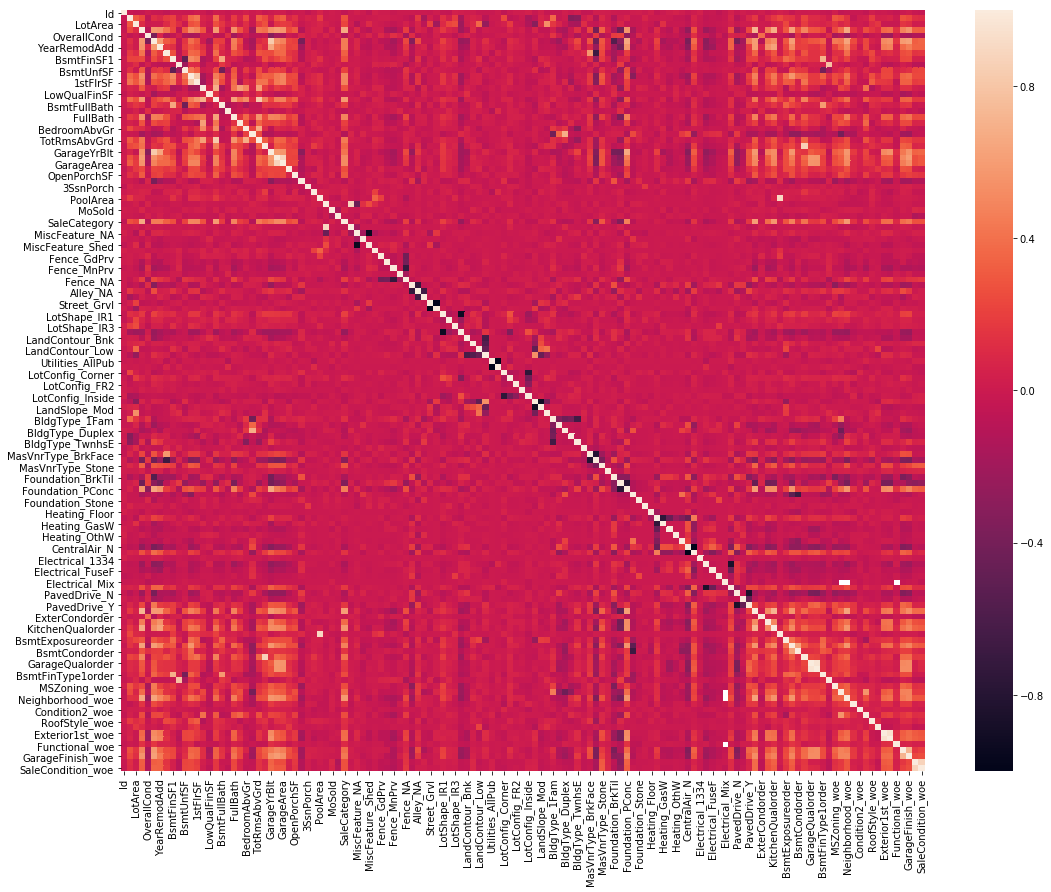

In [268]:
matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(corr)